In [66]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
cd = pd.read_csv("D://assignments//assignment 6//bank-full.csv",sep=';')

print(cd.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [3]:
cd.shape

(45211, 17)

In [6]:
cd.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [52]:
print(list(cd.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


<AxesSubplot:xlabel='y', ylabel='count'>

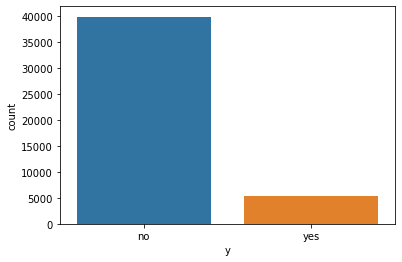

In [55]:
sns.countplot(x='y',data=cd)

In [53]:
cd[cd.duplicated()].shape

(0, 17)

In [45]:
cd.shape

(45211, 17)

In [9]:
cd[cd.isnull().any(axis=1)].head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [10]:
cd.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
cd['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [8]:
cd['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
cd['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [10]:
cd['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [11]:
cd['housing'].value_counts()


yes    25130
no     20081
Name: housing, dtype: int64

In [12]:
cd['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [13]:
cd['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [14]:
cd['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

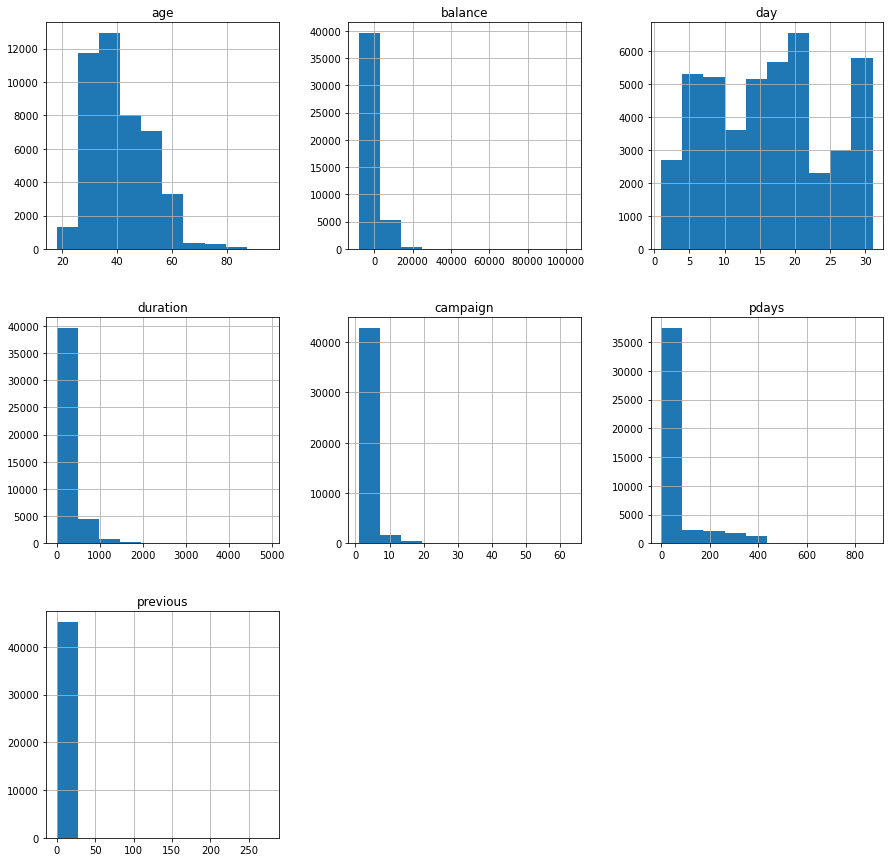

In [15]:
cd.hist(figsize=(15,15))

In [16]:
cd.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:ylabel='age'>

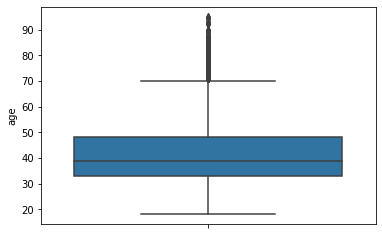

In [17]:
sns.boxplot(y=cd.age)

<AxesSubplot:ylabel='campaign'>

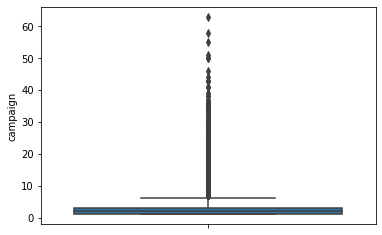

In [18]:
sns.boxplot(y=cd.campaign)

<AxesSubplot:ylabel='pdays'>

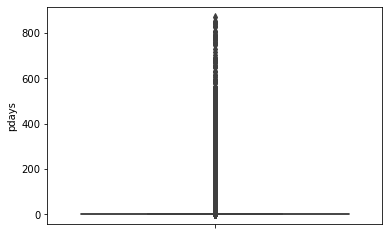

In [19]:
sns.boxplot(y=cd.pdays)

In [14]:
data1=cd

In [15]:
data1 = data1[data1.job != 'unknown']

In [16]:
data1 = data1[data1.education != 'unknown']

In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   loan       43193 non-null  object
 8   contact    43193 non-null  object
 9   day        43193 non-null  int64 
 10  month      43193 non-null  object
 11  duration   43193 non-null  int64 
 12  campaign   43193 non-null  int64 
 13  pdays      43193 non-null  int64 
 14  previous   43193 non-null  int64 
 15  poutcome   43193 non-null  object
 16  y          43193 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [18]:
data1['y'].value_counts()

no     38172
yes     5021
Name: y, dtype: int64

In [51]:
del data1["default" ]

In [52]:
del data1["contact" ]

In [54]:
encoder = preprocessing.LabelEncoder()
data1['job'] = encoder.fit_transform(data1['job'])
data1['marital'] = encoder.fit_transform(data1['marital'])
data1['education'] = encoder.fit_transform(data1['education'])
#data1['default'] = encoder.fit_transform(data1['default'])
data1['housing'] = encoder.fit_transform(data1['housing'])
data1['loan'] = encoder.fit_transform(data1['loan'])
#data1['contact'] = encoder.fit_transform(data1['contact'])
data1['month'] = encoder.fit_transform(data1['month'])
data1['poutcome'] = encoder.fit_transform(data1['poutcome'])
data1['y'] = encoder.fit_transform(data1['y'])

In [55]:
data1.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,0,5,8,261,1,-1,0,3,0
1,44,9,2,1,29,1,0,5,8,151,1,-1,0,3,0
2,33,2,1,1,2,1,1,5,8,76,1,-1,0,3,0
5,35,4,1,2,231,1,0,5,8,139,1,-1,0,3,0
6,28,4,2,2,447,1,1,5,8,217,1,-1,0,3,0


In [56]:
X = data1.iloc[:,0:14]
Y = data1.iloc[:,14]

In [57]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_pred = classifier.predict(X)

In [62]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [63]:
y_pred_df


,actual,predicted_prob
0,0,0
1,0,0
2,0,0
5,0,0
6,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [67]:
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[37419   753]
 [ 4084   937]]


In [68]:
((37419+937)/(4084+937+37419+753))*100

88.80142615701618

In [69]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     38172
           1       0.55      0.19      0.28      5021

    accuracy                           0.89     43193
   macro avg       0.73      0.58      0.61     43193
weighted avg       0.86      0.89      0.86     43193



Text(0, 0.5, 'True Positive Rate')

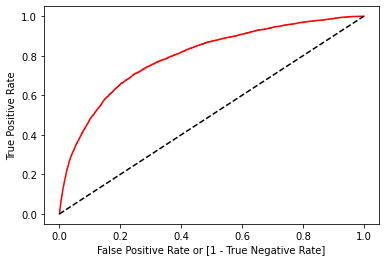

In [70]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [71]:
auc

0.5834448554048476